In [ ]:
# Set the working directory
import os
os.getcwd()
os.chdir('/home/shoyo/Desktop')
os.listdir( os.getcwd() )

In [1]:
# Import modules
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
# !pip install geopandas --quiet
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import scipy
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
# !pip install rasterio --quiet
import rasterio
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import math
from datetime import datetime
import joblib

2023-06-30 10:27:59.521599: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-30 10:27:59.524093: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 10:27:59.575169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 10:27:59.579067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 10:28:00.746579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [156]:
# Set seed
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [157]:
# Load the csv file
csv_path = os.getcwd() + '/SOCwithMODIS3927.csv'
df1 = pd.read_csv(csv_path)
df2 = df1[ (df1.EVI<-1) | (df1.EVI>1) ]

df = pd.DataFrame(columns=df1.columns)
for i in range(len(df1)):
    lat = df1.loc[i, 'latitude']
    lon = df1.loc[i, 'longitude']
    if not ((df2['latitude'] == lat) & (df2['longitude'] == lon)).any():
        # df = pd.concat([df, df1.loc[i]]) 
        df.loc[len(df)] = df1.iloc[i]
        # df = df.append(df1.loc[i]) 

df = df.drop(columns=['latitude', 'longitude', 'year', 'LC'])
df

,SOC,elev,slope,aspect,roughness,twi,SR_B2-1,SR_B3-1,SR_B4-1,SR_B5-1,...,SR_B5,SR_B6,SR_B7,EVI,ST_B10,VV,VH,VV/VH,prec,temp
0,6.84225,1641,1.311631,47.303562,15.660496,-0.83046,0.166671,0.1916,0.207811,0.371354,...,0.421857,0.312834,0.240069,0.20156,278.537831,0.100637,0.016779,5.997724,7.733378,305.686667
1,5.94385,1634,5.549156,61.341667,12.340887,-1.442346,0.372605,0.421583,0.433325,0.565792,...,0.317,0.238625,0.19193,0.208251,278.115705,0.081446,0.023201,3.510426,7.733378,305.376
2,4.4506,1626,5.39333,63.41954,13.694862,-1.242844,0.27762,0.305148,0.311541,0.404409,...,0.309575,0.20645,0.191408,0.178394,279.735847,0.077992,0.012462,6.258336,7.733378,305.376
3,7.10625,1652,1.854871,54.527138,8.628444,-1.174888,0.367902,0.366472,0.369855,0.448093,...,0.403735,0.277304,0.221039,0.216093,276.727989,0.066324,0.01395,4.754431,7.733378,305.686667
4,7.06505,1629,3.340624,22.484619,12.107599,1.348318,0.242035,0.272423,0.284,0.40731,...,0.373843,0.288648,0.22812,0.184308,274.041426,0.073882,0.013287,5.560403,7.733378,305.686667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,22.8393,707,20.518735,0.136192,106.600021,-2.546244,0.62742,0.59519,0.589608,0.635175,...,0.421184,0.306385,0.235765,0.261945,277.474827,0.064739,0.018256,3.546261,12.289015,298.15
3922,30.57,699,38.66111,340.387939,109.372704,2.081008,0.485355,0.504633,0.530978,0.598903,...,0.319393,0.191036,0.150501,0.202044,278.725822,0.109743,0.024399,4.497798,12.289015,298.18
3923,15.9412,806,17.840438,64.873627,90.641815,-1.627684,0.518616,0.507094,0.506846,0.557446,...,0.414515,0.286392,0.209832,0.309452,279.137693,0.055422,0.013671,4.053926,12.289015,298.18
3924,54.9658,880,26.979864,238.814835,104.778091,-3.461416,0.515701,0.516458,0.519826,0.58507,...,0.390535,0.29786,0.254437,0.27747,278.084943,0.261001,0.054931,4.751455,12.289015,298.15


In [158]:
df.columns

Index(['SOC', 'elev', 'slope', 'aspect', 'roughness', 'twi', 'SR_B2-1',
       'SR_B3-1', 'SR_B4-1', 'SR_B5-1', 'SR_B6-1', 'SR_B7-1', 'EVI-1',
       'ST_B10-1', 'VV-1', 'VH-1', 'VV/VH-1', 'prec-1', 'temp-1', 'SR_B2',
       'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'EVI', 'ST_B10', 'VV',
       'VH', 'VV/VH', 'prec', 'temp'],
      dtype='object')

In [159]:
df = df[['SOC', 'elev', 'slope', 'aspect', 'roughness', 'twi', 'SR_B2',
       'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'EVI', 'VV',
       'VH', 'VV/VH', 'prec', 'temp']]
df['temp'] = df['temp']*0.02
# df = df[['SOC', 'elev']]
df

/tmp/ipykernel_4194195/1835045081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['temp']*0.02


,SOC,elev,slope,aspect,roughness,twi,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,EVI,VV,VH,VV/VH,prec,temp
0,6.84225,1641,1.311631,47.303562,15.660496,-0.83046,0.235957,0.287052,0.310084,0.421857,0.312834,0.240069,0.20156,0.100637,0.016779,5.997724,7.733378,6.113733
1,5.94385,1634,5.549156,61.341667,12.340887,-1.442346,0.022503,0.15156,0.173285,0.317,0.238625,0.19193,0.208251,0.081446,0.023201,3.510426,7.733378,6.10752
2,4.4506,1626,5.39333,63.41954,13.694862,-1.242844,0.01835,0.11713,0.12505,0.309575,0.20645,0.191408,0.178394,0.077992,0.012462,6.258336,7.733378,6.10752
3,7.10625,1652,1.854871,54.527138,8.628444,-1.174888,0.162422,0.230444,0.252719,0.403735,0.277304,0.221039,0.216093,0.066324,0.01395,4.754431,7.733378,6.113733
4,7.06505,1629,3.340624,22.484619,12.107599,1.348318,0.124087,0.190294,0.232974,0.373843,0.288648,0.22812,0.184308,0.073882,0.013287,5.560403,7.733378,6.113733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,22.8393,707,20.518735,0.136192,106.600021,-2.546244,0.205694,0.244221,0.236026,0.421184,0.306385,0.235765,0.261945,0.064739,0.018256,3.546261,12.289015,5.963
3922,30.57,699,38.66111,340.387939,109.372704,2.081008,0.036032,0.130069,0.117171,0.319393,0.191036,0.150501,0.202044,0.109743,0.024399,4.497798,12.289015,5.9636
3923,15.9412,806,17.840438,64.873627,90.641815,-1.627684,0.122795,0.200895,0.201967,0.414515,0.286392,0.209832,0.309452,0.055422,0.013671,4.053926,12.289015,5.9636
3924,54.9658,880,26.979864,238.814835,104.778091,-3.461416,0.263485,0.280012,0.26959,0.390535,0.29786,0.254437,0.27747,0.261001,0.054931,4.751455,12.289015,5.963


In [171]:
# Shuffle the data
df = df.sample(frac=1, random_state=42)

# Split the dataset into training, validation and test datasets
n = len(df)

# scaler = MinMaxScaler()
# train_df = scaler.fit_transform(df[0:int(n*0.8)])
# val_df = scaler.fit_transform(df[int(n*0.8):int(n*0.9)])
# test_df = scaler.fit_transform(df[int(n*0.9):])
# Xtrain = train_df[:,1:]
# Ytrain = train_df[:,0]
# Xval = val_df[:,1:]
# Yval = val_df[:,0]
# Xtest = test_df[:,1:]
# Ytest = test_df[:,0]

train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.9)]
test_df = df[int(n*0.9):]
Xtrain = train_df.iloc[:,1:]
Ytrain = train_df.iloc[:,0]
Xval = val_df.iloc[:,1:]
Yval = val_df.iloc[:,0]
Xtest = test_df.iloc[:,1:]
Ytest = test_df.iloc[:,0]

# train_df = scaler.fit_transform(df[:11760])
# val_df = scaler.fit_transform(df[11760:(11760+1464)])
# test_df = scaler.fit_transform(df[(11760+1464):])

In [161]:
# Show metadata of the dataset
df.apply(['mean', 'median', 'max', 'min', 'std', 'skew', 'count']).transpose()

,mean,median,max,min,std,skew,count
SOC,10.463713,7.863617,119.511800,1.161600,9.776697,4.022503,3926.0
elev,829.683902,949.500000,2022.000000,-3.000000,511.701796,-0.230890,3926.0
slope,4.926067,2.796733,44.899754,0.000000,6.428781,2.887663,3926.0
aspect,172.492233,166.017647,359.977112,0.032219,107.046876,0.116194,3926.0
roughness,15.216692,5.734655,201.859283,0.215358,25.439797,2.995559,3926.0
twi,0.406410,0.081835,10.531526,-3.988649,2.122389,1.167213,3926.0
SR_B2,0.203352,0.163811,0.900811,0.005604,0.145114,1.152982,3926.0
SR_B3,0.251021,0.216164,0.841260,0.038315,0.125415,1.142107,3926.0
SR_B4,0.271416,0.239615,0.853401,0.031935,0.125701,1.028487,3926.0
SR_B5,0.414502,0.405983,0.857114,0.200359,0.100556,0.675068,3926.0


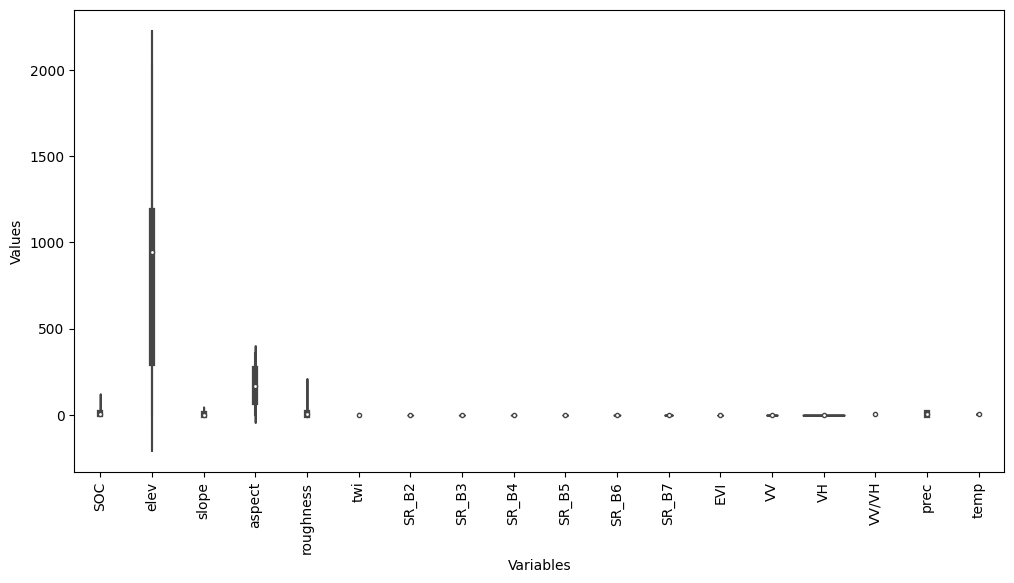

In [172]:
# Show the data ranges of the dataset
# df_std = pd.DataFrame(train_df).melt(var_name='Variables', value_name='Values')
df_std = train_df.melt(var_name='Variables', value_name='Values')
df_std['Values'] = pd.to_numeric(df_std['Values'], errors='coerce')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Variables', y='Values', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
# Set grid search parameters
n_trees_range = [10, 50, 100, 200, 300, 400, 500, 600]
min_samples_range = [2, 5, 10, 15, 20, 25, 30]

# prepare matrix for storing the matrics reached on the validation set per parameter combination
rmse_paramsearch = np.ndarray([len(n_trees_range), len(min_samples_range)])
mae_paramsearch = np.ndarray([len(n_trees_range), len(min_samples_range)])
rsquare_paramsearch = np.ndarray([len(n_trees_range), len(min_samples_range)])
oob_paramsearch = np.ndarray([len(n_trees_range), len(min_samples_range)])
time_paramsearch = np.ndarray([len(n_trees_range), len(min_samples_range)])

# Perform the parameter searching and keep track of performance
for n_trees_index, n_trees in enumerate(n_trees_range):
    for min_leaves_index, min_samples in enumerate(min_samples_range):
        print(f"N trees: {n_trees}, Min. samples samples per leaf: {min_samples}")
        
        # Initialize the random forest classifier
        model = RandomForestRegressor(n_estimators=n_trees, min_samples_split=min_samples, oob_score=True, random_state=42)
        
        # Fit the classifier to the training data/labels
        start = datetime.now()
        model.fit(Xtrain, Ytrain)
        end = datetime.now()
        time_taken = float(f"{(end - start).seconds}.{round((end - start).microseconds, 2)}")

        # Use the model to predict all of the validation pixels
        predictions = model.predict(Xval)

        # Calculate the accuracy of the predicted labels vs the ground truth labels
        rmse = math.sqrt( mean_squared_error(predictions, Yval) )
        mae = mean_absolute_error(predictions, Yval)
        rsquared = r2_score(predictions, Yval)
        oob = model.oob_score_

        # Store accuracies and time taken for this parameter combination
        rmse_paramsearch[n_trees_index, min_leaves_index] = round(rmse, 2)
        mae_paramsearch[n_trees_index, min_leaves_index] = round(mae, 2)
        rsquare_paramsearch[n_trees_index, min_leaves_index] = round(rsquared, 2)
        oob_paramsearch[n_trees_index, min_leaves_index] = round(oob, 2)
        time_paramsearch[n_trees_index, min_leaves_index] = round(time_taken, 2)

/tmp/ipykernel_4194195/606754388.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_rmse.set_xticklabels(n_trees_labels)
/tmp/ipykernel_4194195/606754388.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_rmse.set_yticklabels(min_leaves_labels)
/tmp/ipykernel_4194195/606754388.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_mae.set_xticklabels(n_trees_labels)
/tmp/ipykernel_4194195/606754388.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_mae.set_yticklabels(min_leaves_labels)
/tmp/ipykernel_4194195/606754388.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_rsquared.set_xticklabels(n_trees_labels)
/tmp/ipykernel_4194195/606754388.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_rsquared.set_yticklabels(min_leaves_labels)
/tmp/ipykernel_4194195/606754388.py:31: Use

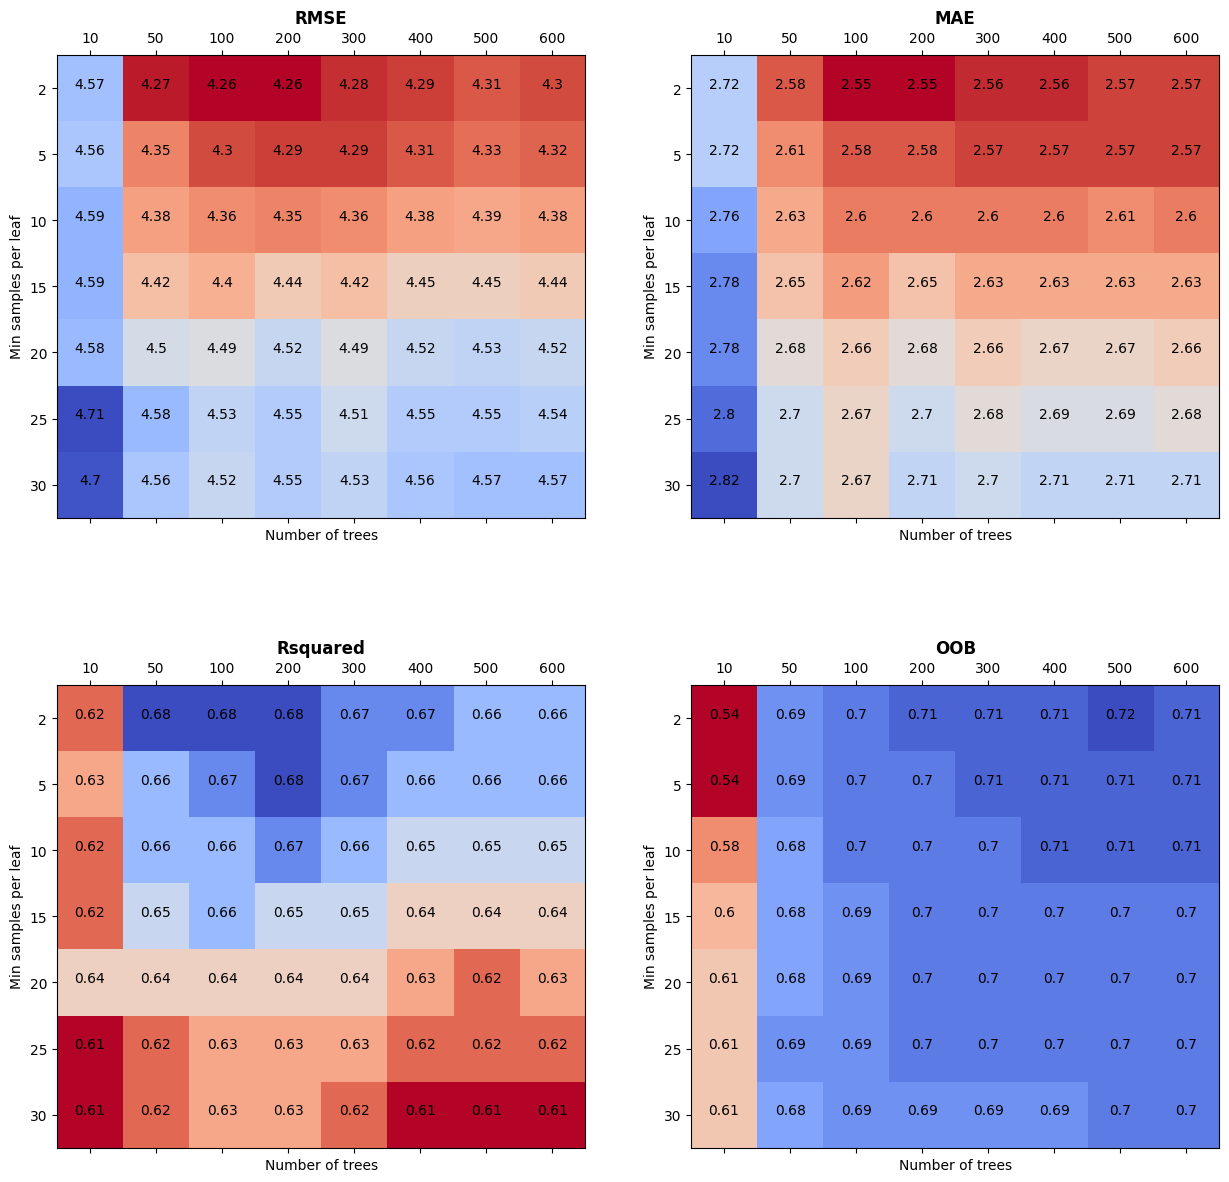

In [117]:
# Plot the validation results
n_trees_labels = [0] + n_trees_range
min_leaves_labels = [0] + min_samples_range 

fig, ((ax_rmse, ax_mae), (ax_rsquared, ax_oob)) = plt.subplots(2, 2, figsize=(15,15))

## Plot RMSE
ax_rmse.set_title("RMSE", weight='bold')
ax_rmse.set(xlabel='Number of trees', ylabel='Min samples per leaf')
ax_rmse.set_xticklabels(n_trees_labels)
ax_rmse.set_yticklabels(min_leaves_labels)
ax_rmse.matshow(rmse_paramsearch.T, cmap=plt.get_cmap('coolwarm_r'))

## Plot MAE
ax_mae.set_title("MAE", weight='bold')
ax_mae.set(xlabel='Number of trees', ylabel='Min samples per leaf')
ax_mae.set_xticklabels(n_trees_labels)
ax_mae.set_yticklabels(min_leaves_labels)
ax_mae.matshow(mae_paramsearch.T, cmap=plt.get_cmap('coolwarm_r'))

## Plot Rsquared
ax_rsquared.set_title("Rsquared", weight='bold')
ax_rsquared.set(xlabel='Number of trees', ylabel='Min samples per leaf')
ax_rsquared.set_xticklabels(n_trees_labels)
ax_rsquared.set_yticklabels(min_leaves_labels)
ax_rsquared.matshow(rsquare_paramsearch.T, cmap=plt.get_cmap('coolwarm_r'))

## Plot oob
ax_oob.set_title("OOB", weight='bold')
ax_oob.set(xlabel='Number of trees', ylabel='Min samples per leaf')
ax_oob.set_xticklabels(n_trees_labels)
ax_oob.set_yticklabels(min_leaves_labels)
ax_oob.matshow(oob_paramsearch.T, cmap=plt.get_cmap('coolwarm_r'))

# ## Plot time taken
# ax_time.set_title("Time Taken in Seconds", weight='bold')
# ax_time.set(xlabel='Number of trees', ylabel='Min samples per leaf')
# ax_time.set_xticklabels(n_trees_labels)
# ax_time.set_yticklabels(min_leaves_labels)
# ax_time.matshow(time_paramsearch.T, cmap=plt.get_cmap('coolwarm_r'))

## Add text to plots
for t_i, t_val in enumerate(n_trees_range):
    for l_i, l_val in enumerate(min_samples_range):
        ax_rmse.text(t_i, l_i, s=rmse_paramsearch[t_i, l_i], ha='center')
        ax_mae.text(t_i, l_i, s=mae_paramsearch[t_i, l_i], ha='center')
        ax_rsquared.text(t_i, l_i, s=rsquare_paramsearch[t_i, l_i], ha='center')
        ax_oob.text(t_i, l_i, s=oob_paramsearch[t_i, l_i], ha='center')
        # ax_time.text(t_i, l_i, s=time_paramsearch[t_i, l_i], ha='center')

In [167]:
# Define a model using the potential best hyperparameters
model = RandomForestRegressor(n_estimators=200, min_samples_split=2, random_state=42)
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)

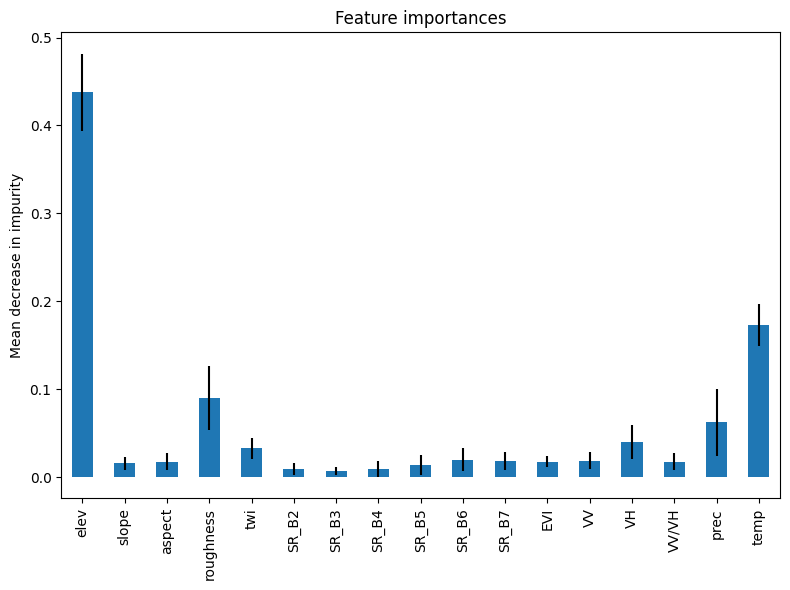

In [169]:
# Plot the feature importance
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df.iloc[:,1:].columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [170]:
# Calculate the metric scores
mse = mean_squared_error(Ypred, Ytest)
print("RMSE", math.sqrt(mse))
mae = mean_absolute_error(Ypred, Ytest)
print("MAE", mae)
R_square = r2_score(Ypred, Ytest) 
print('Coefficient of Determination', R_square) 

RMSE 0.08421872690474652
MAE 0.053202667722052364
Coefficient of Determination -0.20959572038189722


In [124]:
# Save the model
joblib.dump(model, os.getcwd()+'/RF.pkl')

['/home/shoyo/Desktop/RF.pkl']

In [125]:
# Check if the model can be loaded properly
joblib.load('/home/shoyo/Desktop/RF.pkl')

RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

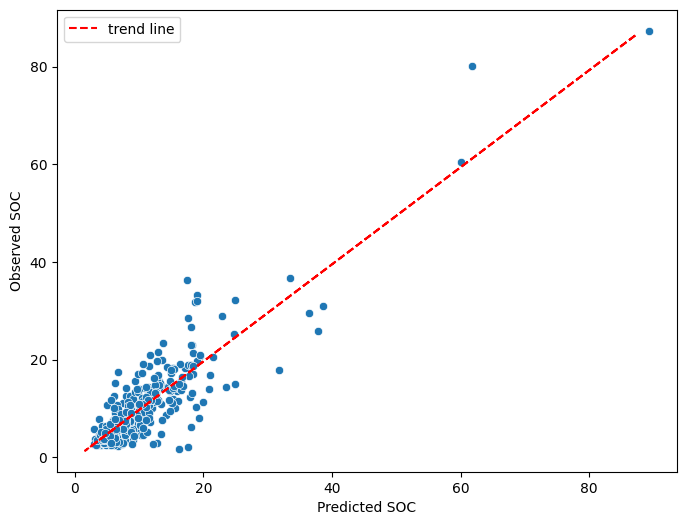

In [121]:
# Show a plot of the predicted SOC against the observed SOC
scatterplot=sns.scatterplot(x=np.squeeze(Ypred), y=np.squeeze(Ytest))
Ypred = pd.to_numeric(Ypred, errors='coerce')
Ytest = pd.to_numeric(Ytest, errors='coerce')
z = np.polyfit(Ypred, Ytest, 1)  #Least squares polynomial fit.
p = np.poly1d(z)                           #A one-dimensional polynomial class.
scatterplot.plot(np.squeeze(Ytest), p(np.squeeze(Ytest)), "r--", label='trend line')
# sns.lineplot(x=np.linspace(0, 80, 100), y=x, 'g', label='y=x')
plt.legend()
plt.xlabel("Predicted SOC")
plt.ylabel("Observed SOC")
plt.show()

ValueError: data type <class 'numpy.object_'> not inexact

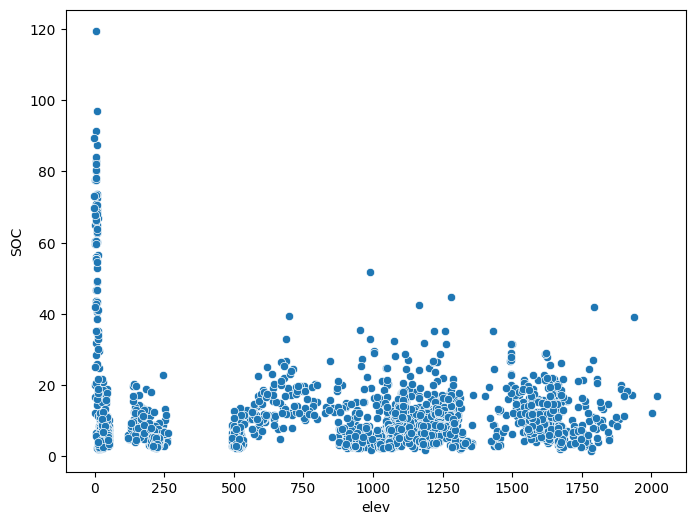

In [97]:
scatterplot=sns.scatterplot(x=df.elev, y=df.SOC)
# Ypred = pd.to_numeric(Ypred, errors='coerce')
# Ytest = pd.to_numeric(Ytest, errors='coerce')
z = np.polyfit(df.elev, df.SOC, 1)  #Least squares polynomial fit.
p = np.poly1d(z)                           #A one-dimensional polynomial class.
scatterplot.plot(df.SOC, p(df.SOC), "r--", label='trend line')
# sns.lineplot(x=np.linspace(0, 80, 100), y=x, 'g', label='y=x')
plt.legend()
plt.xlabel("Predicted SOC")
plt.ylabel("Observed SOC")
plt.show()

In [ ]:
# Create a new column with shuffled regions
shuffled_regions = np.random.permutation(df['region'])
df['shuffled_region'] = shuffled_regions

# Sort the DataFrame based on the shuffled regions
df_sorted = df.sort_values('shuffled_region')

# Drop the 'shuffled_region' column if not needed
df_sorted.drop('shuffled_region', axis=1, inplace=True)